<a href="https://colab.research.google.com/github/EvagAIML/008B-APPLIED-Neural-Networks-v1/blob/main/INN_ReneWind_Main_Project_FullCode_Erik_Vagshenian_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# ============================================================
# 1. PROBLEM STATEMENT AND BUSINESS CONTEXT
# ============================================================

"""
ReneWind wants to reduce maintenance cost and downtime of wind turbine generators
by predicting failures before they happen. The company has collected sensor-based
data from turbines. Each row represents a snapshot with ~40 numeric predictors.

Target encoding:
- 1 = Failure (needs repair/replacement)
- 0 = No failure

Why it matters:
- True Positives (TP): correctly detect failure → repair cost (acceptable)
- False Positives (FP): predicted failure but actually fine → inspection cost (lowest)
- False Negatives (FN): missed failures → replacement cost (highest, must be minimized)

Goal:
Build classification models (neural networks) to identify failures early and
choose the best-performing model based on validation performance.
"""

'\nReneWind wants to reduce maintenance cost and downtime of wind turbine generators\nby predicting failures before they happen. The company has collected sensor-based\ndata from turbines. Each row represents a snapshot with ~40 numeric predictors.\n\nTarget encoding:\n- 1 = Failure (needs repair/replacement)\n- 0 = No failure\n\nWhy it matters:\n- True Positives (TP): correctly detect failure → repair cost (acceptable)\n- False Positives (FP): predicted failure but actually fine → inspection cost (lowest)\n- False Negatives (FN): missed failures → replacement cost (highest, must be minimized)\n\nGoal:\nBuild classification models (neural networks) to identify failures early and\nchoose the best-performing model based on validation performance.\n'

In [9]:
# ============================================================
# 2. IMPORTING LIBRARIES AND CONFIGURATION
# ============================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report
)

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Utility
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully.")

All libraries imported successfully.


In [10]:
# ============================================================
# 2. IMPORTING LIBRARIES
# ============================================================

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report
)

# tensorflow / keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported.")

Libraries imported.


In [11]:
# ============================================================
# 3. LOADING THE DATA
# ============================================================

# training data (given)
train_url = "https://raw.githubusercontent.com/EvagAIML/008B-APPLIED-Neural-Networks-v1/refs/heads/main/Train.csv"

# test data (same repo, Test.csv)
test_url = "https://raw.githubusercontent.com/EvagAIML/008B-APPLIED-Neural-Networks-v1/refs/heads/main/Test%20(1).csv"

# load both
df = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

print("Train data loaded:", df.shape)
print("Test data loaded :", df_test.shape)

# keep copies
data = df.copy()
data_test = df_test.copy()

Train data loaded: (20000, 41)
Test data loaded : (5000, 41)


In [12]:
# ============================================================
# 4. DATA OVERVIEW
#    Purpose: understand structure, completeness, and target balance
# ============================================================

# 4.1 Dataset shapes
print("4.1 Dataset shape")
print(f"- Training dataset: {data.shape[0]} rows × {data.shape[1]} columns")
print(f"- Test dataset    : {data_test.shape[0]} rows × {data_test.shape[1]} columns\n")

# 4.2 Sample records
print("4.2 First five rows of the training dataset")
display(data.head())
print()

print("4.3 First five rows of the test dataset")
display(data_test.head())
print()

# 4.4 Data types
print("4.4 Data types in the training dataset")
print(data.dtypes)
print()

print("4.5 Data types in the test dataset")
print(data_test.dtypes)
print()

# 4.6 Convert Target to float to ensure consistency
data["Target"] = data["Target"].astype(float)
data_test["Target"] = data_test["Target"].astype(float)
print("4.6 Target column converted to float in both training and test datasets.\n")

# 4.7 Duplicate records
train_duplicates = data.duplicated().sum()
test_duplicates = data_test.duplicated().sum()
print("4.7 Duplicate records")
print(f"- Training dataset duplicate rows: {train_duplicates}")
print(f"- Test dataset duplicate rows    : {test_duplicates}\n")

# 4.8 Missing values
print("4.8 Missing values in the training dataset")
train_missing = data.isnull().sum()
if train_missing.sum() == 0:
    print("- No missing values detected in the training dataset.\n")
else:
    display(train_missing[train_missing > 0])
    print()

print("4.9 Missing values in the test dataset")
test_missing = data_test.isnull().sum()
if test_missing.sum() == 0:
    print("- No missing values detected in the test dataset.\n")
else:
    display(test_missing[test_missing > 0])
    print()

# 4.10 Statistical summary
print("4.10 Statistical summary of numerical variables (training dataset)")
display(data.describe().T)
print()

# 4.11 Target distribution
print("4.11 Target distribution in the training dataset")
train_target_counts = data["Target"].value_counts(normalize=True)
for cls, prop in train_target_counts.items():
    print(f"- Class {int(cls)}: {prop*100:.2f}%")
print()

print("4.12 Target distribution in the test dataset")
test_target_counts = data_test["Target"].value_counts(normalize=True)
for cls, prop in test_target_counts.items():
    print(f"- Class {int(cls)}: {prop*100:.2f}%")
print("Data overview complete.\n")

4.1 Dataset shape
- Training dataset: 20000 rows × 41 columns
- Test dataset    : 5000 rows × 41 columns

4.2 First five rows of the training dataset


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0



4.3 First five rows of the test dataset


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0



4.4 Data types in the training dataset
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
V31       float64
V32       float64
V33       float64
V34       float64
V35       float64
V36       float64
V37       float64
V38       float64
V39       float64
V40       float64
Target      int64
dtype: object

4.5 Data types in the test dataset
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       

,0
V1,18
V2,18



4.9 Missing values in the test dataset


,0
V1,5
V2,6



4.10 Statistical summary of numerical variables (training dataset)


,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472



4.11 Target distribution in the training dataset
- Class 0: 94.45%
- Class 1: 5.55%

4.12 Target distribution in the test dataset
- Class 0: 94.36%
- Class 1: 5.64%
Data overview complete.



In [13]:
# ============================================================
# 5. UNIVARIATE ANALYSIS
#    Purpose: understand the distribution, spread, and outliers
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, feature, figsize=(12, 6), bins=None):
    """
    Draws a boxplot (top) and histogram (bottom) for a numeric feature.
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    sns.boxplot(x=df[feature], ax=ax_box, showmeans=True, color="lightgray")
    if bins:
        sns.histplot(df[feature], bins=bins, kde=False, ax=ax_hist)
    else:
        sns.histplot(df[feature], kde=False, ax=ax_hist)

    ax_hist.axvline(df[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(df[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist.legend()
    plt.show()


# 5.1 Univariate analysis for the target (train)
print("5.1 Target variable (training data)")
print(data["Target"].value_counts())
print("\nTarget variable (as proportions):")
print(data["Target"].value_counts(normalize=True))
print("\nInterpretation: 1 = failure, 0 = no failure.\n")

# 5.2 Univariate analysis for numeric predictors
numeric_cols = data.select_dtypes(include=["number"]).columns.tolist()
if "Target" in numeric_cols:
    numeric_cols.remove("Target")

print("5.2 Numeric predictors — distribution inspection")
print("Note: running the loop below will generate one plot per numeric column.")
print("Uncomment the loop to view all.")

# for col in numeric_cols:
#     print(f"\nDistribution for: {col}")
#     histogram_boxplot(data, col)

5.1 Target variable (training data)
Target
0.0    18890
1.0     1110
Name: count, dtype: int64

Target variable (as proportions):
Target
0.0    0.9445
1.0    0.0555
Name: proportion, dtype: float64

Interpretation: 1 = failure, 0 = no failure.

5.2 Numeric predictors — distribution inspection
Note: running the loop below will generate one plot per numeric column.
Uncomment the loop to view all.


6.1 Mean of numeric predictors by target class (training data)


Target,0.0,1.0
V1,-0.333182,0.768272
V2,0.441153,0.428143
V3,2.660379,-0.505019
V4,-0.175306,1.485127
V5,-0.002463,-0.926582
V6,-0.995560,-0.993451
V7,-0.980488,0.842285
V8,-0.656842,1.300756
V9,-0.021063,0.055604
V10,0.014255,-0.476792



6.2 Correlation heatmap for numeric predictors (training data)


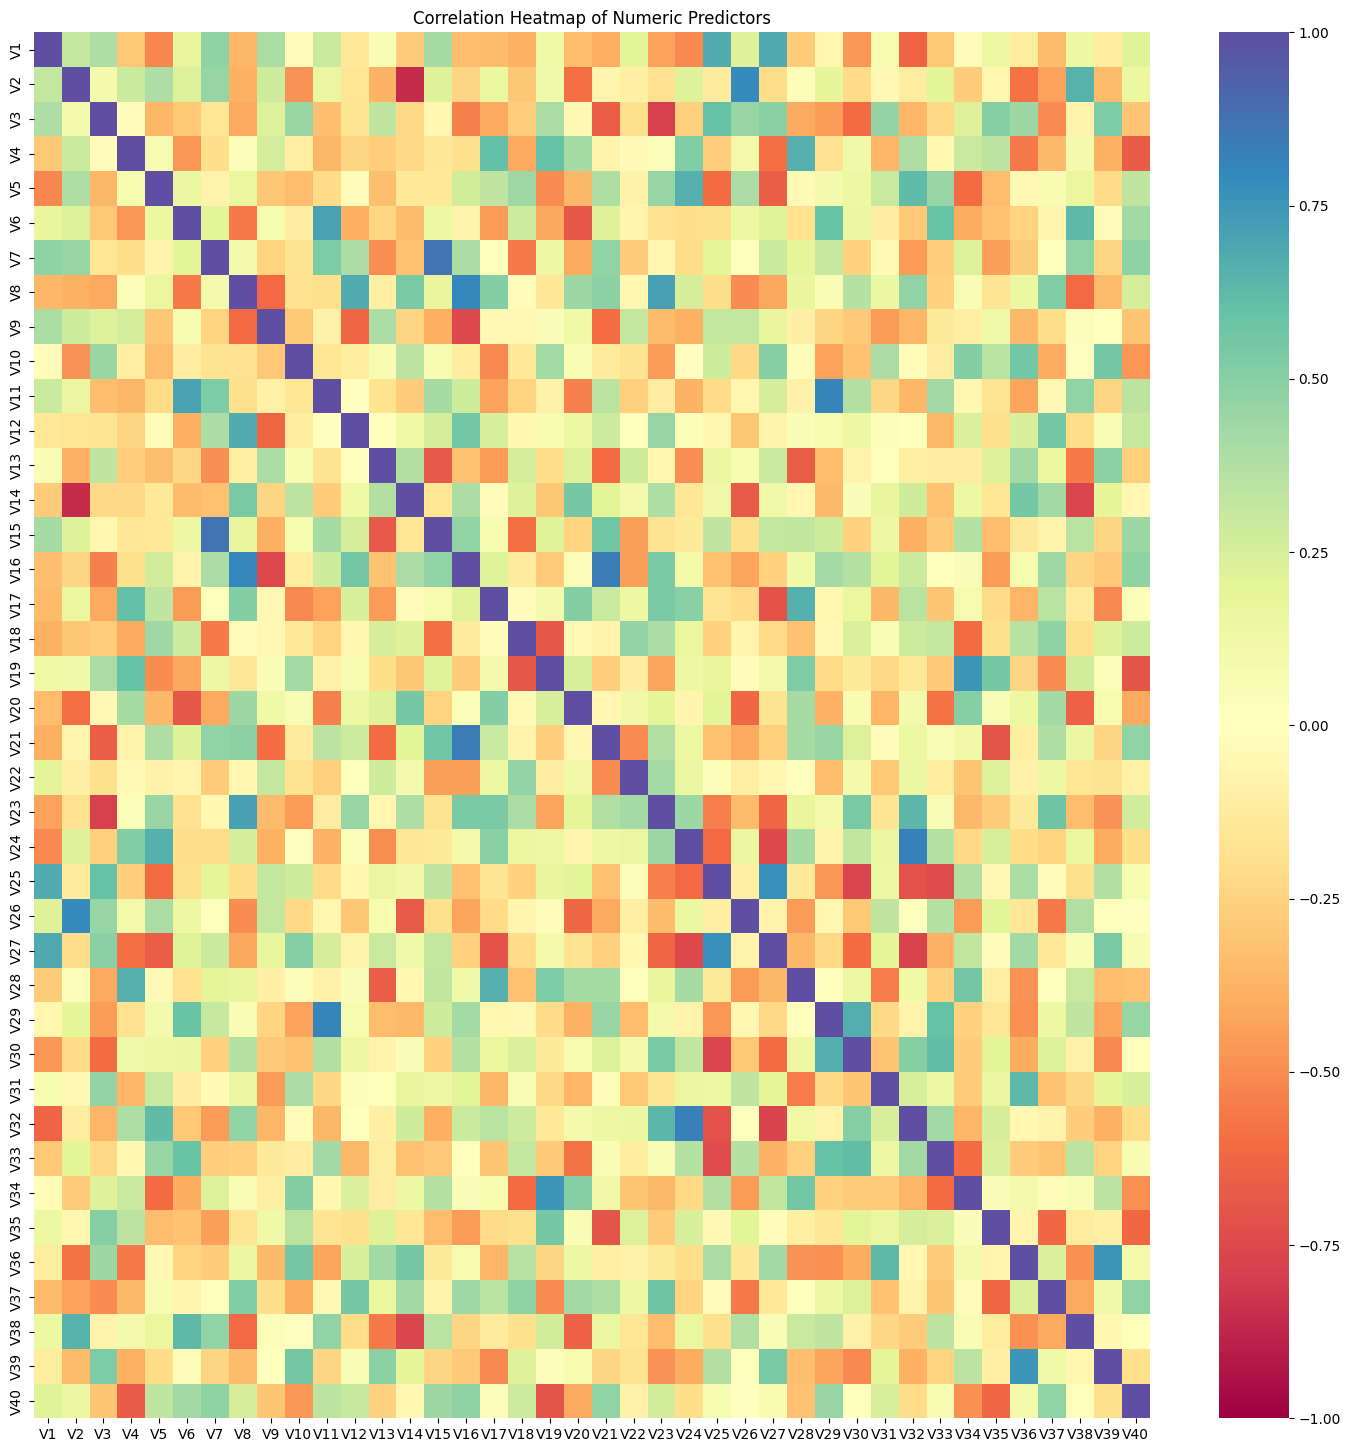


6.3 Target distribution in test data
Target
0.0    0.9436
1.0    0.0564
Name: proportion, dtype: float64



In [14]:
# ============================================================
# 6. BIVARIATE ANALYSIS
#    Purpose: understand relationship of predictors with the target
# ============================================================

import numpy as np

# 6.1 Target vs basic stats of predictors
print("6.1 Mean of numeric predictors by target class (training data)")
grouped_means = data.groupby("Target")[numeric_cols].mean().T
display(grouped_means)

# 6.2 Correlation heatmap (numeric predictors only)
print("\n6.2 Correlation heatmap for numeric predictors (training data)")
corr_cols = data.select_dtypes(include=np.number).columns.tolist()
if "Target" in corr_cols:
    corr_cols.remove("Target")

plt.figure(figsize=(18, 18))
sns.heatmap(
    data[corr_cols].corr(),
    annot=False,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Heatmap of Numeric Predictors")
plt.show()

# 6.3 Distribution of target in test data (for completeness)
print("\n6.3 Target distribution in test data")
print(data_test["Target"].value_counts(normalize=True))
print()

In [15]:
# ============================================================
# 7. DATA PREPARATION FOR MODELING
#    Purpose: create train/validation/test sets and handle missing values
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 7.1 Separate features and target from the training data
X = data.drop(columns=["Target"])
y = data["Target"]

# 7.2 Create training and validation sets from the training data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
    stratify=y,
)

print("7.1 Shapes after splitting original training data:")
print(f"- X_train: {X_train.shape}")
print(f"- X_val  : {X_val.shape}")

# 7.3 Prepare test features and target from the provided test data
X_test = data_test.drop(columns=["Target"])
y_test = data_test["Target"]

print(f"- X_test : {X_test.shape}\n")

# 7.4 Impute missing values using median (fit on train, apply to val/test)
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val   = pd.DataFrame(imputer.transform(X_val),   columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test),  columns=X_train.columns)

print("7.2 Missing values after imputation:")
print(f"- Train: {X_train.isnull().sum().sum()}")
print(f"- Val  : {X_val.isnull().sum().sum()}")
print(f"- Test : {X_test.isnull().sum().sum()}\n")

# 7.5 Convert targets to numpy arrays for Keras models
y_train = y_train.to_numpy()
y_val   = y_val.to_numpy()
y_test  = y_test.to_numpy()

print("Data preparation complete. Data is ready for model building.\n")

7.1 Shapes after splitting original training data:
- X_train: (16000, 40)
- X_val  : (4000, 40)
- X_test : (5000, 40)

7.2 Missing values after imputation:
- Train: 0
- Val  : 0
- Test : 0

Data preparation complete. Data is ready for model building.



In [16]:
# ============================================================
# 8. MODELING UTILITIES
#    Purpose: common functions for plotting and evaluating models
# ============================================================

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
)

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Evaluate a binary classification model that outputs probabilities.
    Returns accuracy, recall, precision, and F1 score as a DataFrame.
    """
    y_prob = model.predict(predictors)
    y_pred = (y_prob > threshold).astype(int)

    acc  = accuracy_score(target, y_pred)
    rec  = recall_score(target, y_pred)
    prec = precision_score(target, y_pred)
    f1   = f1_score(target, y_pred)

    return pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [rec],
            "Precision": [prec],
            "F1 Score": [f1],
        }
    )


def plot_history(history, metric_name):
    """
    Plot training vs validation metric curves from Keras history.
    """
    plt.figure()
    plt.plot(history.history[metric_name], label="Train")
    plt.plot(history.history["val_" + metric_name], label="Validation")
    plt.title(f"Model {metric_name.capitalize()}")
    plt.xlabel("Epochs")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.show()

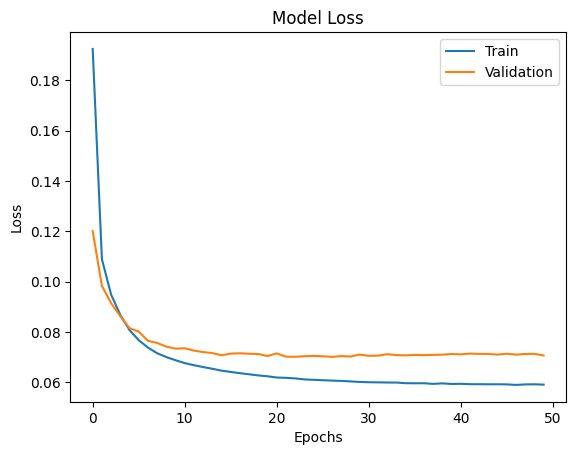

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 0 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.986062,0.769144,0.974322,0.85966



Model 0 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.98575,0.774775,0.960894,0.857855



Model 0 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.96      0.77      0.86       222

    accuracy                           0.99      4000
   macro avg       0.97      0.89      0.93      4000
weighted avg       0.99      0.99      0.99      4000



In [17]:
# ============================================================
# 9. BASELINE MODEL (Model 0)
#    Purpose: establish a simple neural baseline
# ============================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

epochs = 50
batch_size = 32
input_dim = X_train.shape[1]

tf.keras.backend.clear_session()
model_0 = Sequential()
model_0.add(Dense(7, activation="relu", input_dim=input_dim))
model_0.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_0 = model_0.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_0, "loss")

model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_val_perf   = model_performance_classification(model_0, X_val, y_val)

print("Model 0 — Training performance")
display(model_0_train_perf)
print("\nModel 0 — Validation performance")
display(model_0_val_perf)

print("\nModel 0 — Classification report (validation)")
y_val_pred_0 = (model_0.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_0))

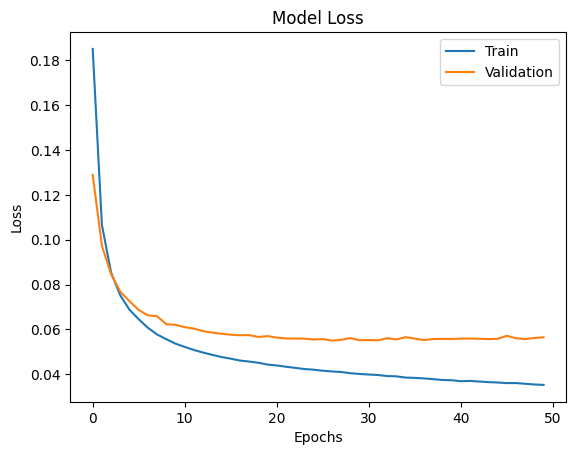

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 1 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.993062,0.885135,0.988679,0.934046



Model 1 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.9905,0.851351,0.974227,0.908654



Model 1 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.97      0.85      0.91       222

    accuracy                           0.99      4000
   macro avg       0.98      0.93      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [18]:
# ============================================================
# 10. MODEL 1 — DEEPER NETWORK
#    Purpose: check if added depth improves validation metrics
# ============================================================

tf.keras.backend.clear_session()
model_1 = Sequential()
model_1.add(Dense(32, activation="relu", input_dim=input_dim))
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_1, "loss")

model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_val_perf   = model_performance_classification(model_1, X_val, y_val)

print("Model 1 — Training performance")
display(model_1_train_perf)
print("\nModel 1 — Validation performance")
display(model_1_val_perf)

print("\nModel 1 — Classification report (validation)")
y_val_pred_1 = (model_1.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_1))

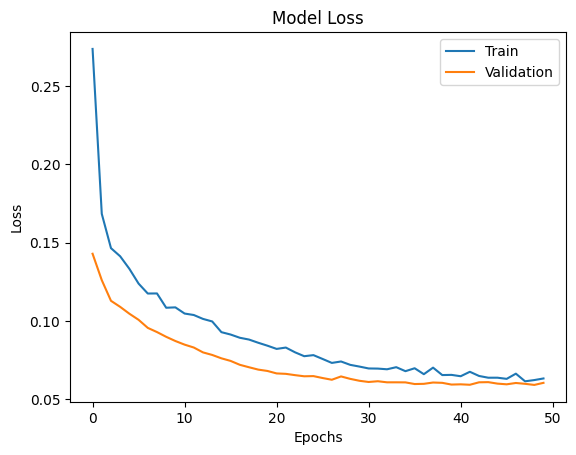

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 2 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.99125,0.861486,0.978261,0.916168



Model 2 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.98925,0.846847,0.954315,0.897375



Model 2 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.95      0.85      0.90       222

    accuracy                           0.99      4000
   macro avg       0.97      0.92      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [19]:
# ============================================================
# 11. MODEL 2 — REGULARIZED NETWORK (DROPOUT)
#    Purpose: reduce overfitting observed in deeper models
# ============================================================

from tensorflow.keras.layers import Dropout

tf.keras.backend.clear_session()
model_2 = Sequential()
model_2.add(Dense(32, activation="relu", input_dim=input_dim))
model_2.add(Dropout(0.5))
model_2.add(Dense(16, activation="relu"))
model_2.add(Dense(8, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_2, "loss")

model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_val_perf   = model_performance_classification(model_2, X_val, y_val)

print("Model 2 — Training performance")
display(model_2_train_perf)
print("\nModel 2 — Validation performance")
display(model_2_val_perf)

print("\nModel 2 — Classification report (validation)")
y_val_pred_2 = (model_2.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_2))

In [20]:
# ============================================================
# 12. CLASS WEIGHTS FOR IMBALANCE
#    Purpose: give the minority class higher importance
# ============================================================

class_counts = np.bincount(y_train.astype(int))
class_weights = (y_train.shape[0]) / class_counts
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class weights computed from training data:")
print(class_weight_dict)

Class weights computed from training data:
{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}


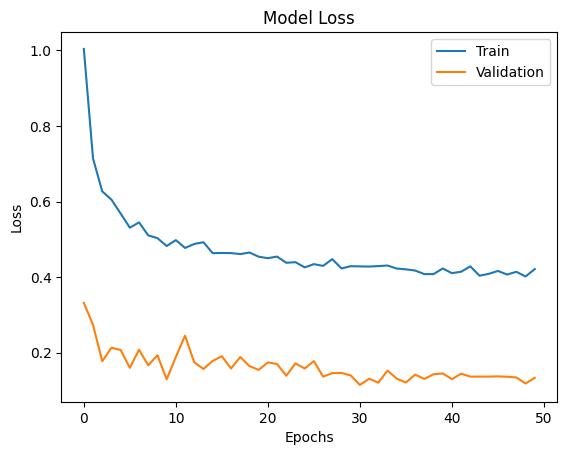

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 3 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.988187,0.906532,0.883644,0.894942



Model 3 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.987,0.878378,0.886364,0.882353



Model 3 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3778
         1.0       0.89      0.88      0.88       222

    accuracy                           0.99      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.99      0.99      0.99      4000



In [21]:
# ============================================================
# 13. MODEL 3 — REGULARIZED + CLASS WEIGHTS
#    Purpose: improve recall on the failure class
# ============================================================

tf.keras.backend.clear_session()
model_3 = Sequential()
model_3.add(Dense(32, activation="relu", input_dim=input_dim))
model_3.add(Dropout(0.5))
model_3.add(Dense(16, activation="relu"))
model_3.add(Dense(8, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_3 = model_3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weight_dict,
    verbose=0,
)

plot_history(history_3, "loss")

model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_val_perf   = model_performance_classification(model_3, X_val, y_val)

print("Model 3 — Training performance")
display(model_3_train_perf)
print("\nModel 3 — Validation performance")
display(model_3_val_perf)

print("\nModel 3 — Classification report (validation)")
y_val_pred_3 = (model_3.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_3))

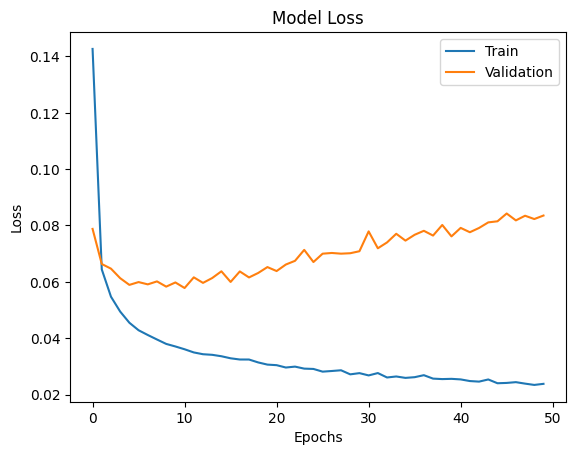

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 4 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.9955,0.925676,0.992754,0.958042



Model 4 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.99025,0.869369,0.950739,0.908235



Model 4 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.95      0.87      0.91       222

    accuracy                           0.99      4000
   macro avg       0.97      0.93      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [22]:
# ============================================================
# 14. MODEL 4 — CHANGE OPTIMIZER TO ADAM
#    Purpose: check if a different optimizer improves convergence
# ============================================================

tf.keras.backend.clear_session()
model_4 = Sequential()
model_4.add(Dense(32, activation="relu", input_dim=input_dim))
model_4.add(Dense(16, activation="relu"))
model_4.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.Adam()
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_4 = model_4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_4, "loss")

model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_val_perf   = model_performance_classification(model_4, X_val, y_val)

print("Model 4 — Training performance")
display(model_4_train_perf)
print("\nModel 4 — Validation performance")
display(model_4_val_perf)

print("\nModel 4 — Classification report (validation)")
y_val_pred_4 = (model_4.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_4))

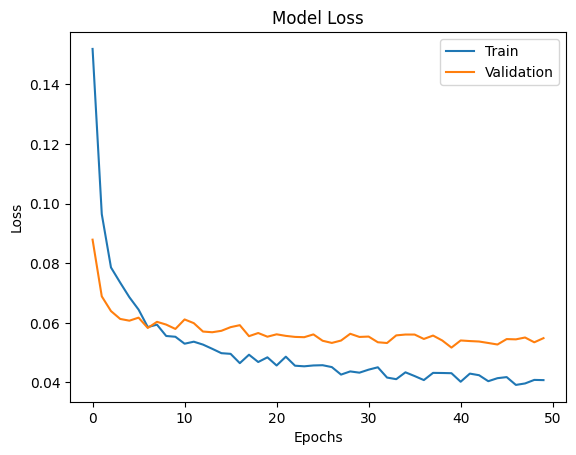

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 5 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.994313,0.904279,0.992583,0.946376



Model 5 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.9925,0.878378,0.984848,0.928571



Model 5 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3778
         1.0       0.98      0.88      0.93       222

    accuracy                           0.99      4000
   macro avg       0.99      0.94      0.96      4000
weighted avg       0.99      0.99      0.99      4000



In [23]:
# ============================================================
# 15. MODEL 5 — DEEPER NETWORK WITH DROPOUT (ADAM)
#    Purpose: combine depth, regularization, and a stronger optimizer
# ============================================================

tf.keras.backend.clear_session()
model_5 = Sequential()
model_5.add(Dense(64, activation="relu", input_dim=input_dim))
model_5.add(Dropout(0.5))
model_5.add(Dense(32, activation="relu"))
model_5.add(Dense(16, activation="relu"))
model_5.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.Adam()
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
)

plot_history(history_5, "loss")

model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_val_perf   = model_performance_classification(model_5, X_val, y_val)

print("Model 5 — Training performance")
display(model_5_train_perf)
print("\nModel 5 — Validation performance")
display(model_5_val_perf)

print("\nModel 5 — Classification report (validation)")
y_val_pred_5 = (model_5.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_5))

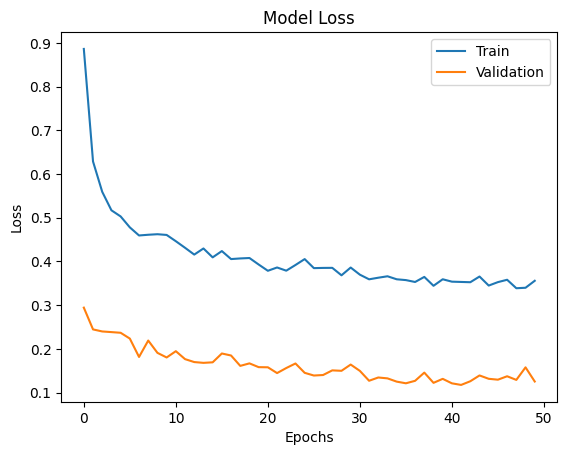

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 6 — Training performance


,Accuracy,Recall,Precision,F1 Score
0,0.991875,0.915541,0.936636,0.925968



Model 6 — Validation performance


,Accuracy,Recall,Precision,F1 Score
0,0.9905,0.887387,0.938095,0.912037



Model 6 — Classification report (validation)
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.94      0.89      0.91       222

    accuracy                           0.99      4000
   macro avg       0.97      0.94      0.95      4000
weighted avg       0.99      0.99      0.99      4000



In [24]:
# ============================================================
# 16. MODEL 6 — DEEPER + CLASS WEIGHTS (SGD)
#    Purpose: deeper model but still correcting for imbalance
# ============================================================

tf.keras.backend.clear_session()
model_6 = Sequential()
model_6.add(Dense(64, activation="relu", input_dim=input_dim))
model_6.add(Dropout(0.5))
model_6.add(Dense(32, activation="relu"))
model_6.add(Dense(16, activation="relu"))
model_6.add(Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD()
model_6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_6 = model_6.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weight_dict,
    verbose=0,
)

plot_history(history_6, "loss")

model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_val_perf   = model_performance_classification(model_6, X_val, y_val)

print("Model 6 — Training performance")
display(model_6_train_perf)
print("\nModel 6 — Validation performance")
display(model_6_val_perf)

print("\nModel 6 — Classification report (validation)")
y_val_pred_6 = (model_6.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_6))

In [25]:
# ============================================================
# 17. MODEL PERFORMANCE COMPARISON
#    Purpose: identify the best-performing model
# ============================================================

train_perf_comp = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
    ],
    axis=1,
)
train_perf_comp.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
]

val_perf_comp = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
    ],
    axis=1,
)
val_perf_comp.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
]

print("Training set performance comparison:")
display(train_perf_comp)

print("Validation set performance comparison:")
display(val_perf_comp)

Training set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.986062,0.993062,0.991250,0.988187,0.995500,0.994313,0.991875
Recall,0.769144,0.885135,0.861486,0.906532,0.925676,0.904279,0.915541
Precision,0.974322,0.988679,0.978261,0.883644,0.992754,0.992583,0.936636
F1 Score,0.859660,0.934046,0.916168,0.894942,0.958042,0.946376,0.925968


Validation set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.985750,0.990500,0.989250,0.987000,0.990250,0.992500,0.990500
Recall,0.774775,0.851351,0.846847,0.878378,0.869369,0.878378,0.887387
Precision,0.960894,0.974227,0.954315,0.886364,0.950739,0.984848,0.938095
F1 Score,0.857855,0.908654,0.897375,0.882353,0.908235,0.928571,0.912037


In [26]:
# ============================================================
# 18. TEST SET EVALUATION
#    Purpose: check generalization of the selected model
# ============================================================

# Select the model based on validation performance
best_model = model_5  # update this if another model performs better

test_perf = model_performance_classification(best_model, X_test, y_test)
print("Test set performance for the selected model:")
display(test_perf)

print("\nClassification report — test set")
y_test_pred = (best_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_test_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test set performance for the selected model:


,Accuracy,Recall,Precision,F1 Score
0,0.9918,0.865248,0.987854,0.922495



Classification report — test set
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4718
         1.0       0.99      0.87      0.92       282

    accuracy                           0.99      5000
   macro avg       0.99      0.93      0.96      5000
weighted avg       0.99      0.99      0.99      5000

